In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 5.1

In [ ]:
df1 = pd.read_csv('data_banknote_authentication.csv')

In [ ]:
df1.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## a

In [ ]:
# nie potrzebna jest nam kolumny kurtosis, entropy, więc je wyrzućmy:
x, y = df1.values[:,[0,1]], df1.values[:,-1]

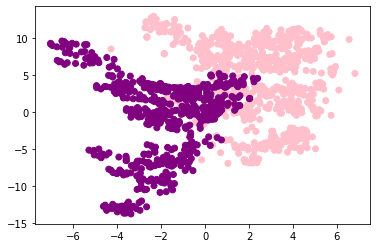

In [ ]:
y = LabelEncoder().fit_transform(y)
colormap = np.array(['pink','purple'])
plt.scatter(x[:,0], x[:,1], c = colormap[y])

## b

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

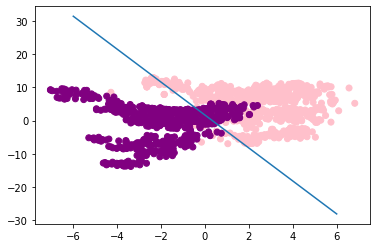

In [ ]:
LDA = LinearDiscriminantAnalysis(store_covariance = True).fit(x,y)
QDA = QuadraticDiscriminantAnalysis(store_covariance = True).fit(x,y)
a_lda = LDA.coef_[0]
b_lda = - LDA.intercept_
colormap = np.array(['pink','purple'])
plt.scatter(x[:,0], x[:,1], c = colormap[y])
plt.plot([-6, 6], [(6.0*a_lda[0]+b_lda)/a_lda[1], (-6.0*a_lda[0]+b_lda)/a_lda[1]])

In [ ]:
b_lda

array([-0.38497949])

In [ ]:
x1 = x[y==1,:]
x0 = x[y==0,:]

In [ ]:
x1@a_lda

##c

**umiemy juz dopasowac prosta lda do danych, jak teraz naniesc krzywa generowana przez qda?**


macierz kowariancji w klasach:

In [ ]:
sigma_1 = QDA.covariance_[1]
sigma_0 = QDA.covariance_[0]

odwracamy macierz cov

In [ ]:
sigma_1inv = np.linalg.inv(sigma_1)
sigma_0inv = np.linalg.inv(sigma_0)

liczymy średnie w poszczególnycj klasach:

In [ ]:
mean1 = QDA.means_[1]
mean0 = QDA.means_[0]

Uwaga! teraz najtrudniejsze xdd liczymy współczynniki kwadratowej krzywej dzielącej w QDA

In [ ]:
A = -(sigma_1inv-sigma_0inv)/2 
B =  sigma_1inv@mean1-sigma_0inv@mean0
C = -mean1@sigma_1inv@mean1/2+mean0@sigma_0inv@mean0/2-np.log(np.linalg.det(sigma_1)/np.linalg.det(sigma_0))+np.log(x1.shape[0]/x0.shape[0])

In [ ]:
x1 = np.arange(-6, 6, 0.1)
y1 = np.arange(-20, 20, 0.1)
xx, yy = np.meshgrid(x1, y1, sparse=True) #siatka punktów x i 
z = (xx**2*A[0,0]+2*xx*yy*A[0,1]+ + yy**2*A[1,1]+xx*B[0]+yy*B[1]+C)  #definiujemy równanie krzywej kwadratowej QDA

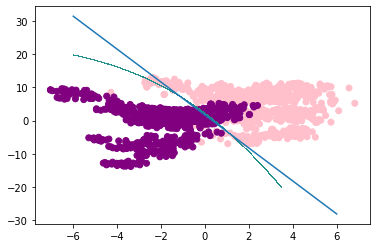

In [ ]:
colormap = np.array(['pink','purple'])
plt.scatter(x[:,0], x[:,1], c = colormap[y])
plt.plot([-6, 6], [(6.0*a_lda[0]+b_lda)/a_lda[1], (-6.0*a_lda[0]+b_lda)/a_lda[1]])
plt.contourf(x1,y1,z, levels=[0,0.01]) #nanosimy dodatkowo krzywą QDA, levels oznacza grubość linii

## d

Dla QDA



*   za pomocą metody predict



In [ ]:
QDA.predict([[4.2,7.2]])

array([0])



*   za pomocą krzywej



In [ ]:
print(x[0]@A@x[0]+x[0]@B+C) #sprawdzamy jak leży względem krzywej dzielącej

-4.971690932109876


Dla LDA


*   za pomocą metody predict

In [ ]:
LDA.predict([[4.2,7.2]])

array([0])



*   za pomocą krzywej

In [ ]:
# próg odcięcia
- LDA.intercept_

array([-0.38497949])

In [ ]:
a = LDA.coef_
b = - LDA.intercept_
[[4.2,7.2]]@a[0] - b

array([-6.82117172])

## e

In [ ]:
LDA.predict_proba([[4.2,7.2]])[0][0]

0.9976505287683147

In [ ]:
QDA.predict_proba([[4.2,7.2]])[0][0]

0.9958016855255691

# 6.2

In [ ]:
df2 = pd.read_csv('bank-full-encoded.csv')

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


##a

In [ ]:
X = df2.values[:,:-1]
y = df2.values[:,-1]

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.1)

##b

In [ ]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB

In [ ]:
gnb  = GaussianNB()
gnb.fit(X_tr, y_tr)

cnb = CategoricalNB()
cnb.fit(X_tr, y_tr)

CategoricalNB()

In [ ]:
gnb.predict_log_proba(X_te)

array([[-0.05381227, -2.94903919],
       [-1.91316495, -0.159714  ],
       [-0.26393515, -1.46111854],
       ...,
       [-0.13084059, -2.09848265],
       [-0.03666515, -3.32420504],
       [-0.11184492, -2.24604329]])

In [ ]:
gnb.predict_proba(X_te)

array([[0.94760998, 0.05239002],
       [0.14761246, 0.85238754],
       [0.76802334, 0.23197666],
       ...,
       [0.87735762, 0.12264238],
       [0.96399887, 0.03600113],
       [0.89418291, 0.10581709]])

In [ ]:
cnb.predict_proba(X_te)

array([[0.99554198, 0.00445802],
       [0.92536465, 0.07463535],
       [0.92257152, 0.07742848],
       ...,
       [0.97661968, 0.02338032],
       [0.99593981, 0.00406019],
       [0.99680751, 0.00319249]])

## c

In [ ]:
AUC1 = roc_auc_score(y_te, cnb.predict_proba(X_te)[:,1])
AUC2 = roc_auc_score(y_te, gnb.predict_proba(X_te)[:,1])

In [ ]:
print(AUC1, AUC2)

0.8586240874277781 0.8142005755363462


In [ ]:
cnb_fpr, cnb_tpr, _ = roc_curve(y_te, cnb.predict_proba(X_te)[:,1])
gnb_fpr, gnb_tpr, _ = roc_curve(y_te, gnb.predict_proba(X_te)[:,1])

Text(0, 0.5, 'tpr')

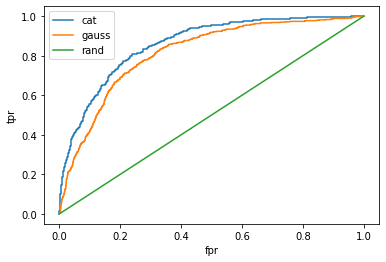

In [ ]:
plt.plot(cnb_fpr, cnb_tpr, label = 'cat')
plt.plot(gnb_fpr, gnb_tpr, label = 'gauss')
plt.plot([0,1], [0,1], label = 'rand')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

#6.3

In [ ]:
df3 = pd.read_csv('dataR2.csv')

In [ ]:
df3.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df_train = df3[::4]

In [ ]:
df_train.index

RangeIndex(start=0, stop=116, step=4)

In [ ]:
df_test = df3.drop(df_train.index)